In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 251 kB/s 
     |████████████████████████████████| 6.4 MB 18.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import yfinance as yf
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as scipy

mrc=yf.download(tickers='MBG.DE',start='2020-01-01', end='2022-06-15')
bmw=yf.download(tickers='BMW.DE',start='2020-01-01', end='2022-06-15')
volv=yf.download(tickers='VOL1.SG',start='2020-01-01', end='2022-06-15')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Dane pochodzą z portalu Yahoo Finance. Ukazują ceny akcji 3 marek samochodowych: Mercedes, BMW oraz Volvo

In [3]:
df=pd.DataFrame({
    'mercedes':mrc.Close,
    'bmw':bmw.Close,
    'Volvo':volv.Close,
})
df.head()

,mercedes,bmw,Volvo
Date,,,
2020-01-02,49.974998,74.220001,14.950
2020-01-03,49.070000,73.320000,14.915
2020-01-06,48.805000,73.050003,14.610
2020-01-07,49.195000,74.220001,14.900
2020-01-08,49.470001,74.410004,15.005


**Wykresy Mercedesa, BMW, Volvo**

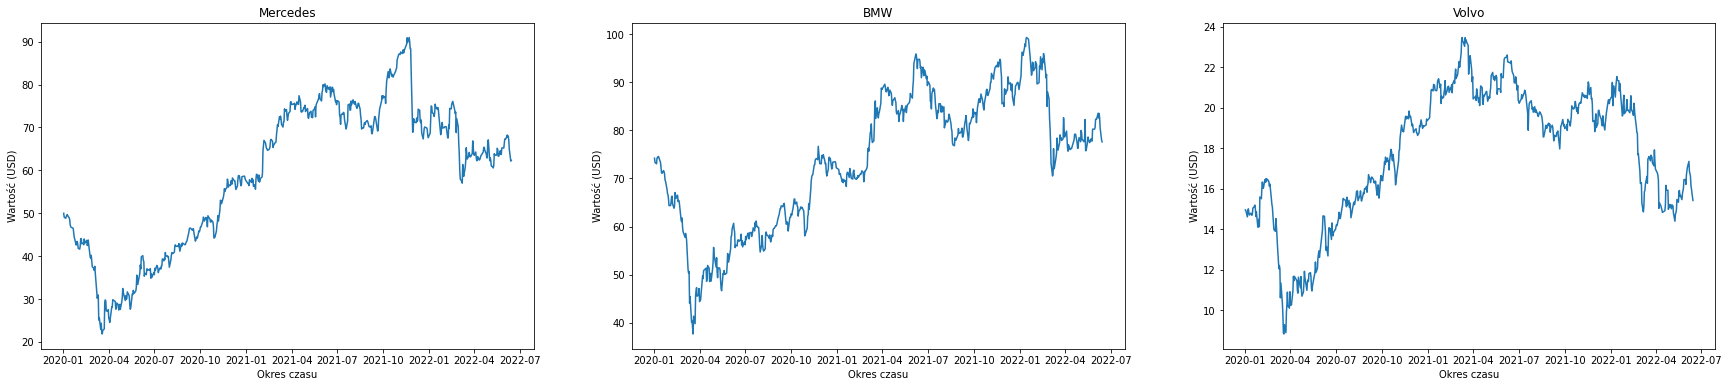

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.plot(df['mercedes'])
plt.title('Mercedes')
plt.ylabel('Wartość (USD)')
plt.xlabel('Okres czasu')

plt.subplot(132)
plt.plot(df['bmw'])
plt.title('BMW')
plt.ylabel('Wartość (USD)')
plt.xlabel('Okres czasu')

plt.subplot(133)
plt.plot(df['Volvo'])
plt.title('Volvo')
plt.ylabel('Wartość (USD)')
plt.xlabel('Okres czasu')
plt.show()

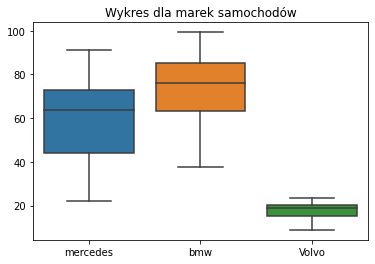

In [ ]:
sns.boxplot(data=df)
plt.title('Wykres dla marek samochodów')
plt.show()

**Podsumowanie statystyk Mercedesa, BMW, Volvo**

In [ ]:
df.describe()

,mercedes,bmw,Volvo
count,624.000000,624.000000,624.000000
mean,59.148418,74.140593,17.728069
std,16.790810,13.811943,3.221006
min,21.840000,37.660000,8.824000
25%,43.981249,63.157498,15.376250
50%,63.500000,76.244999,18.774000
75%,72.922503,85.340002,20.392499
max,90.970001,99.320000,23.469999


**Histogramy oraz funkcje gęstości Mercedesa, BMW i Volvo**

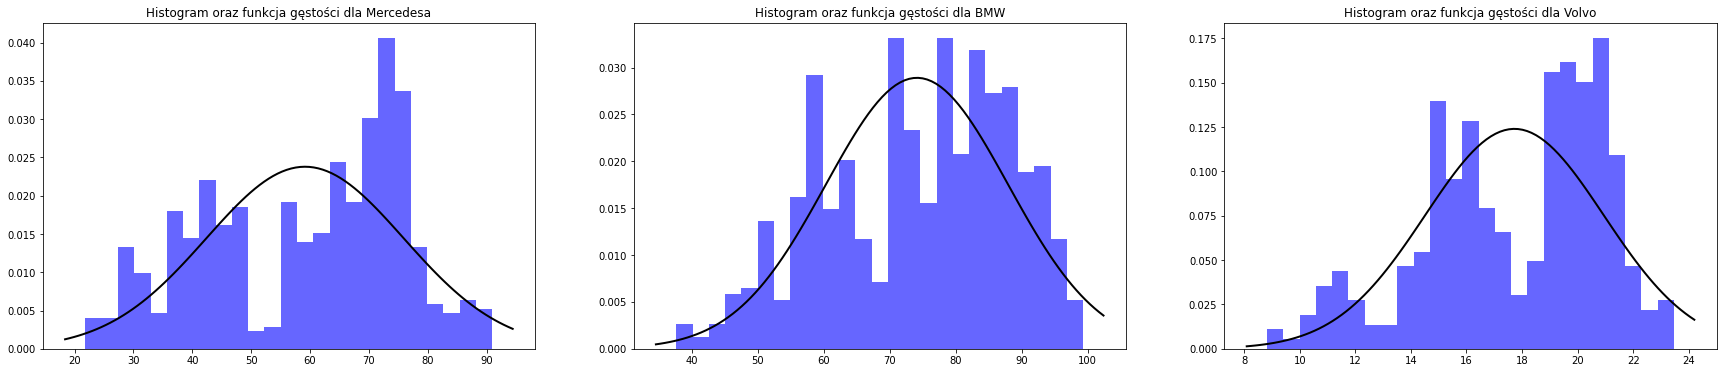

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(131)
mu, std = st.norm.fit(df['mercedes'])
plt.hist(df['mercedes'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
plt.title('Histogram oraz funkcja gęstości dla Mercedesa')
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(132)
mu, std = st.norm.fit(df['bmw'])
plt.hist(df['bmw'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
plt.title('Histogram oraz funkcja gęstości dla BMW')
plt.plot(x, p, 'k', linewidth=2)

plt.subplot(133)
mu, std = st.norm.fit(df['Volvo'])
plt.hist(df['Volvo'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, std)
plt.title('Histogram oraz funkcja gęstości dla Volvo')
plt.plot(x, p, 'k', linewidth=2)
plt.show() 

**Rozkłady Mercedesa, BMW, Volvo**

62.86000061035156
77.43000030517578
18.746000289916992


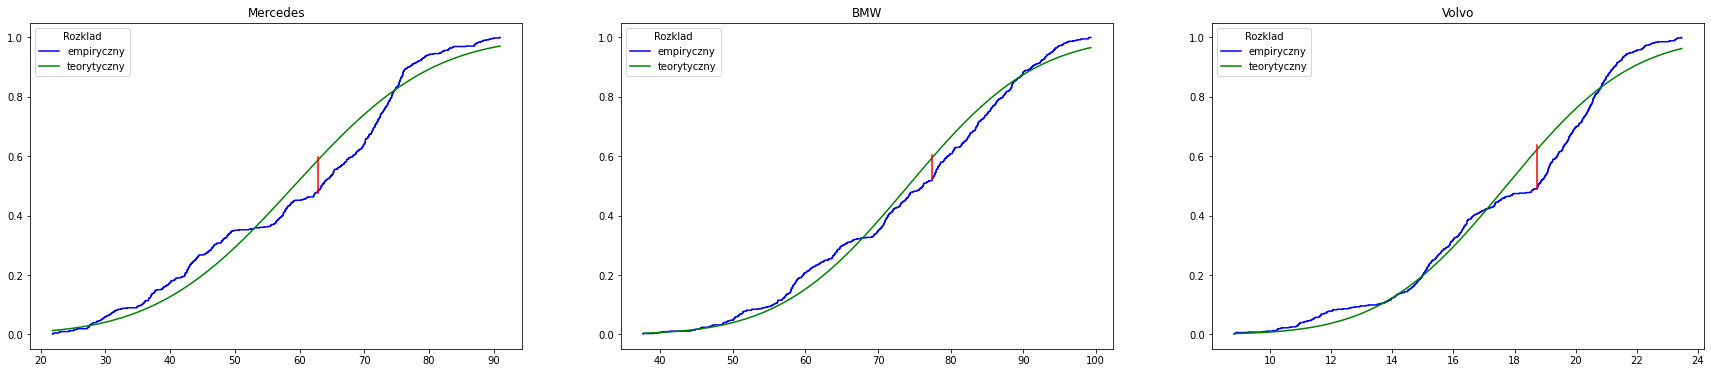

In [ ]:
x=df['mercedes']
x=np.sort(x)
ecdf=np.arange(1,len(x)+1,1)/len(x)
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.step(x,ecdf,color='blue',label='empiryczny')
teorytyczny=st.norm(loc=np.mean(x),scale=np.std(x))
t=np.linspace(min(x),max(x),500)
plt.plot(t,teorytyczny.cdf(t),color='green',label='teorytyczny')

dist=np.abs(ecdf-teorytyczny.cdf(x))
k=np.argmax(dist)
print(x[k])
plt.axvline(x[k],teorytyczny.cdf(x[k]),ecdf[k],color='red')
plt.legend(title='Rozklad')
plt.title('Mercedes')

y=df['bmw']
y=np.sort(y)
ecdf=np.arange(1,len(y)+1,1)/len(y)
plt.subplot(132)
plt.step(y,ecdf,color='blue',label='empiryczny')
teorytyczny=st.norm(loc=np.mean(y),scale=np.std(y))
t=np.linspace(min(y),max(y),500)
plt.plot(t,teorytyczny.cdf(t),color='green',label='teorytyczny')

dist=np.abs(ecdf-teorytyczny.cdf(y))
k=np.argmax(dist)
print(y[k])
plt.axvline(y[k],teorytyczny.cdf(y[k]),ecdf[k],color='red')
plt.legend(title='Rozklad')
plt.title('BMW')

z=df['Volvo']
z=np.sort(z)
ecdf=np.arange(1,len(z)+1,1)/len(z)
plt.subplot(133)
plt.step(z,ecdf,color='blue',label='empiryczny')
teorytyczny=st.norm(loc=np.mean(z),scale=np.std(z))
t=np.linspace(min(z),max(z),500)
plt.plot(t,teorytyczny.cdf(t),color='green',label='teorytyczny')

dist=np.abs(ecdf-teorytyczny.cdf(z))
k=np.argmax(dist)
print(z[k])
plt.axvline(z[k],teorytyczny.cdf(z[k]),ecdf[k],color='red')
plt.legend(title='Rozklad')
plt.title('Volvo')
plt.show()

In [13]:
st.shapiro(df)

(0.8987754583358765, 1.841055395167028e-33)

**Model Liniowy**

In [15]:
regresja=smf.ols(formula='mercedes~bmw',data=df)
wynik=regresja.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               mercedes   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     5690.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          3.57e-315
Time:                        16:36:57   Log-Likelihood:                -1922.1
No. Observations:                 624   AIC:                             3848.
Df Residuals:                     622   BIC:                             3857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.4260      1.154    -22.900      0.000     -28.692     -24.160
bmw            1.1542      0.015     75.429      0.000       1.124       1.184
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.174
Skew:                          -0.041   Prob(JB):                        0.917
Kurtosis:                       2.999   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

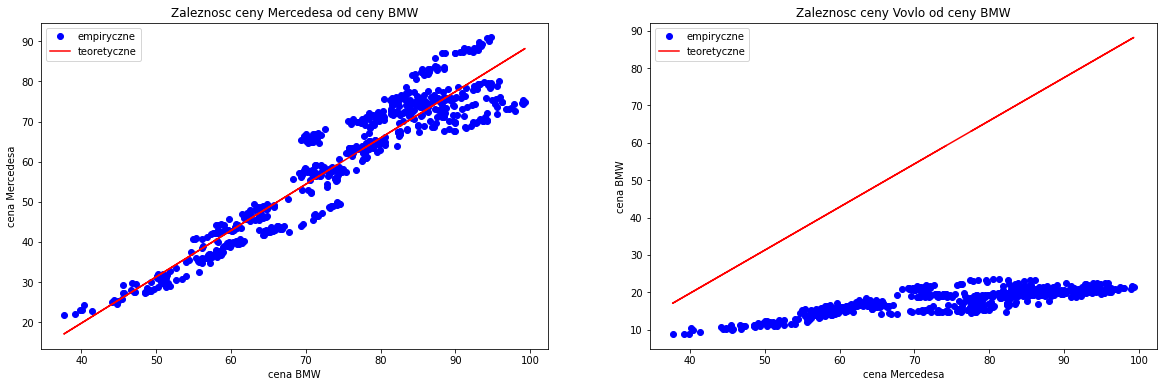

In [16]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(df['bmw'],df['mercedes'],linestyle='',marker='o',color='blue',label='empiryczne')
plt.plot(df['bmw'],wynik.predict(df['bmw']),linestyle='solid',color='red',label='teoretyczne')
plt.ylabel('cena Mercedesa')
plt.xlabel('cena BMW')
plt.legend()
plt.title('Zaleznosc ceny Mercedesa od ceny BMW')

plt.subplot(122)
plt.plot(df['bmw'],df['Volvo'],linestyle='',marker='o',color='blue',label='empiryczne')
plt.plot(df['bmw'],wynik.predict(df['bmw']),linestyle='solid',color='red',label='teoretyczne')
plt.xlabel('cena Mercedesa')
plt.ylabel('cena BMW')
plt.legend()
plt.title('Zaleznosc ceny Vovlo od ceny BMW')
plt.show()